In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/biswasvempati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/biswasvempati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading the dataset

In [65]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv",header=0,sep=',', quotechar='"')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [66]:
df.isnull().count()

Review    20491
Rating    20491
dtype: int64

In [67]:
df['Rating'].value_counts()
#count gives the total dataset count
#value_count gives the count of the individual value

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Cleaning the reviews

In [68]:
#For cleaning the dataset
import re

def  clean_text(text):
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", T))  

    return text

In [69]:
df['Review']= clean_text(df['Review'])

In [70]:
df['Review'] = df['Review'].str.replace('#','')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


Labelling the dataset and converting the multi class to binary class classification

<AxesSubplot:xlabel='Rating', ylabel='count'>

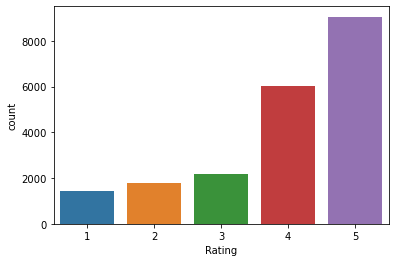

In [71]:
sns.countplot(data=df,x='Rating')

In [72]:
#Labelling
def label_encode(x):
  if x==1 or x==2 or x==3:
    #Label 0 as Negative
    return 0
  if x==4 or x==5:
    #Label 1 Positive
    return 1

In [73]:
df['label'] = df['Rating'].apply(lambda x: label_encode(x))
df.head()

,Review,Rating,label
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4 experience hotel monaco seatt...,3,0
3,unique great stay wonderful time hotel monaco ...,5,1
4,great stay great stay went seahawk game awesom...,5,1


<AxesSubplot:xlabel='label', ylabel='count'>

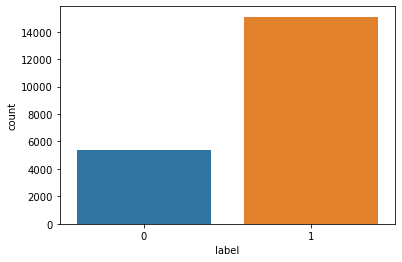

In [74]:
sns.countplot(data=df,x='label')

In [75]:
df['label'].value_counts()

1    15093
0     5398
Name: label, dtype: int64

Preprocessing

In [76]:
punc=string.punctuation

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()


def data_preprocessing(txt):
    
    #converting to lowercase
    txt=txt.lower()
    
    #Removing Punctuation
    txt="".join([x for x in txt if x not in punc])
    
    #Removing stopwords
    txt=" ".join([word for word in str(txt).split() if word not in stop_words])
    
    #Stemming
    txt = " ".join([stemmer.stem(word) for word in txt.split()])

    return txt
    
df['text'] = df['Review'].apply(data_preprocessing)

In [77]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night  '

In [78]:
df['text'][0]

'nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint nonexist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay 40 park night'

Vectorize

In [79]:
### Creating a python object of the class TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=400, min_df=0.05, max_df=0.9)
tfidf = tfidfconverter.fit_transform(df['text']).toarray()

Train and Test split - 70% and 30%

In [80]:
X_train,X_test,y_train,y_test = train_test_split(tfidf,df['label'],test_size=0.3,random_state=0)

Upsampling using SMOTE

In [81]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

[Text(0.5, 1.0, 'Train Class distribution befor upsampling')]

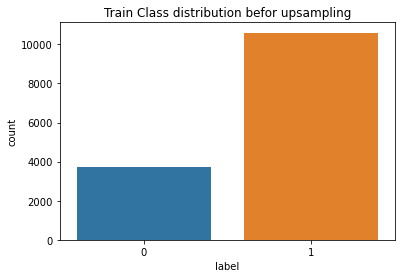

In [82]:
sns.countplot(data=pd.DataFrame(y_train),x='label').set(title="Train Class distribution befor upsampling")

In [83]:
# Up sampling for Training data using smote

#-----Upsampling----

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

print("After Upsampling:-")
print(Counter(y_train))

Before Upsampling:-
Counter({1: 10594, 0: 3749})
After Upsampling:-
Counter({0: 10594, 1: 10594})


[Text(0.5, 1.0, 'Train Class distribution after upsampling')]

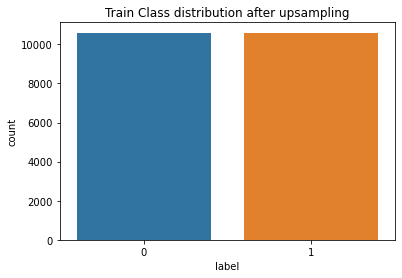

In [84]:
sns.countplot(data=pd.DataFrame(y_train),x='label').set(title="Train Class distribution after upsampling")

[Text(0.5, 1.0, 'Test Class distribution befor upsampling')]

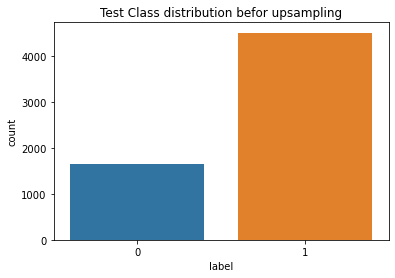

In [85]:
sns.countplot(data=pd.DataFrame(y_test),x='label').set(title="Test Class distribution befor upsampling")

In [86]:
# Up sampling for Testing data using smote

#-----Upsampling----

print("Before Upsampling:-")
print(Counter(y_test))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_test, y_test = oversample.fit_resample(X_test,y_test)

print("After Upsampling:-")
print(Counter(y_test))

Before Upsampling:-
Counter({1: 4499, 0: 1649})
After Upsampling:-
Counter({0: 4499, 1: 4499})


[Text(0.5, 1.0, 'Test Class distribution after upsampling')]

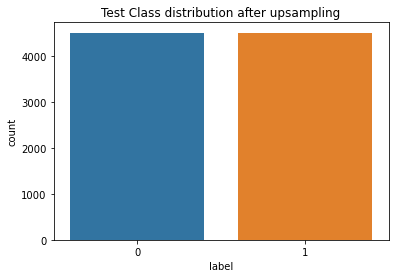

In [87]:
sns.countplot(data=pd.DataFrame(y_test),x='label').set(title="Test Class distribution after upsampling")

SVM Model on Entire Dataset after the upsampling of train and test set

In [97]:
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training set size :  21188
Test set size :  8998
Accuracy of SVM Classifier:   0.890
Confusion matrix, without normalization


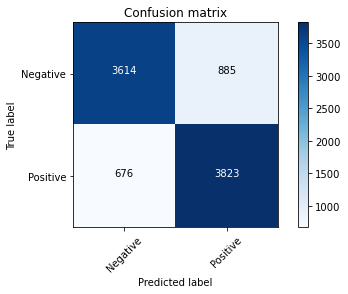

In [105]:
#svm model on entire test and train dataset with label
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.metrics import classification_report
import itertools
svc_label = SVC(decision_function_shape='ovo').fit(X_train, y_train)
y_pred_svm_label=svc_label.predict(X_test)
print("Training set size : ", len(X_train))
print("Test set size : ", len(X_test))
score = accuracy_score(y_test, y_pred_svm_label)
print("Accuracy of SVM Classifier:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

In [94]:
# Hyperparameter tuning for SVM
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  21.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  38.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  33.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  52.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  38.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  38.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  36.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  58.5s
[CV] END ......................C=0.1, gamma=0.0

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time= 1.0min
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time= 1.5min
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time= 1.5min
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time= 1.6min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=  56.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 1.0min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.0min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.0min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.0min
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=  24.9s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=  25.2s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=  38.1s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [95]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [96]:
new_pred=grid.predict(X_test)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4499
           1       0.81      0.93      0.87      4499

    accuracy                           0.86      8998
   macro avg       0.87      0.86      0.86      8998
weighted avg       0.87      0.86      0.86      8998



In [100]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
GNB=GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)

accuracy:   0.827
Confusion matrix, without normalization


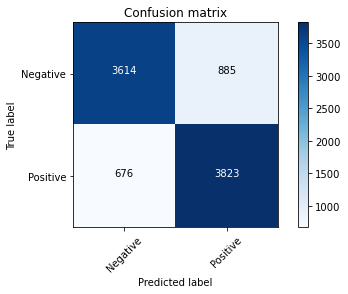

In [101]:
import itertools
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

In [102]:
MNB.fit(X_train, y_train)
pred_MNB= MNB.predict(X_test)

accuracy:   0.819
Confusion matrix, without normalization


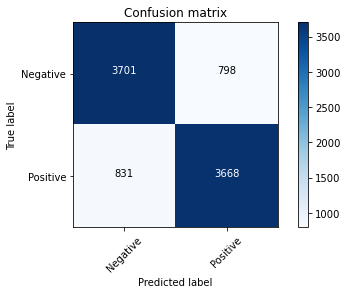

In [103]:
import itertools
score = accuracy_score(y_test, pred_MNB)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred_MNB)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

<AxesSubplot:>

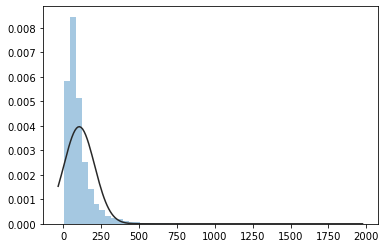

In [89]:
#Getting the words count in each review
from scipy.stats import norm

word_count = [len(x.split(" ")) for x in df["Review"]]
df["word_count"] = df["Review"].apply(lambda x: len(str(x).split(" ")))


sns.distplot(word_count, fit=norm, kde=False)

In [90]:
df.head()

,Review,Rating,label,text,word_count
0,nice hotel expensive parking got good deal sta...,4,1,nice hotel expens park got good deal stay hote...,89
1,ok nothing special charge diamond member hilto...,2,0,ok noth special charg diamond member hilton de...,252
2,nice rooms not 4 experience hotel monaco seatt...,3,0,nice room 4 experi hotel monaco seattl good ho...,219
3,unique great stay wonderful time hotel monaco ...,5,1,uniqu great stay wonder time hotel monaco loca...,91
4,great stay great stay went seahawk game awesom...,5,1,great stay great stay went seahawk game awesom...,193


In [91]:
df['word_count'].mean()

106.37470108828266

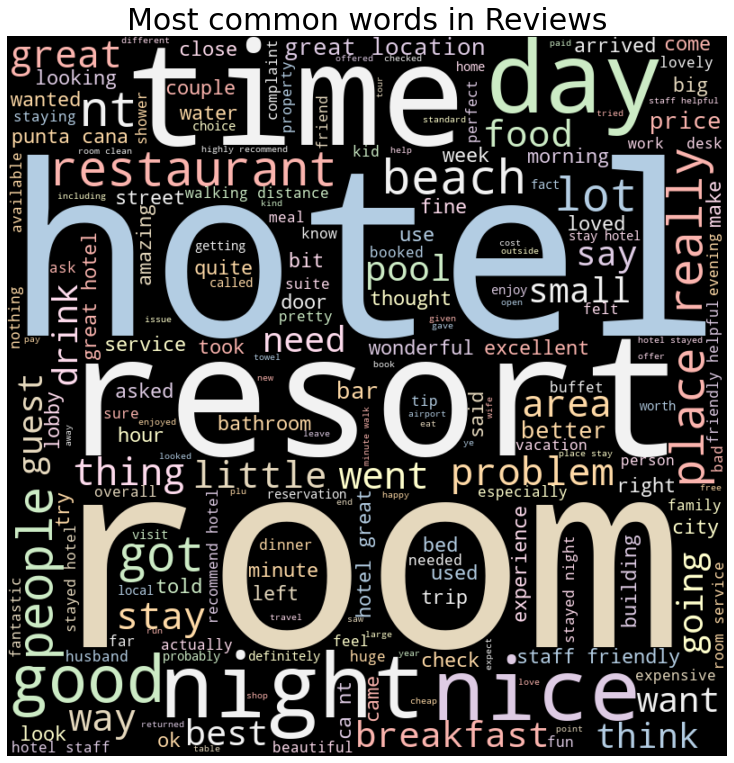

In [92]:
from wordcloud import WordCloud,STOPWORDS
def wordCloud_generator(data):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(df['Review'])